# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [92]:

import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator


from sklearn.decomposition import PCA

sns.set_theme(context="notebook", style="darkgrid")

%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score

In [93]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [94]:
scaler = StandardScaler()
scaler.fit(X)
X_sca = pd.DataFrame(
    scaler.transform(X), columns=scaler.feature_names_in_
)

In [95]:
X_sca

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [144]:
km8_fit = KMeans(n_clusters=8,random_state=42)
km8_fit.fit(X_sca)

KMeans(random_state=42)

In [145]:
X["km8_clu"] = km8_fit.labels_
X_sca["km8_clu"] = km8_fit.labels_

In [146]:
X_sca['sil_k8'] = silhouette_samples(X_sca.drop('km8_clu',axis=1), X_sca['km8_clu'])
X['sil_k8'] = silhouette_samples(X_sca.drop('km8_clu',axis=1), X_sca['km8_clu'])

<AxesSubplot:xlabel='km8_clu', ylabel='sil_k8'>

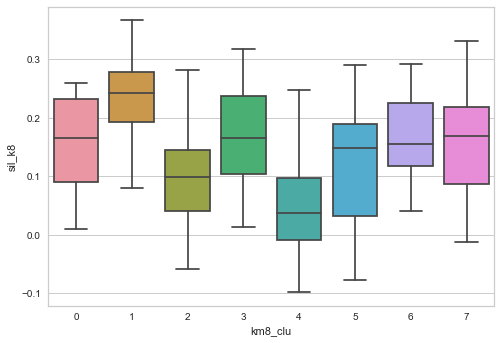

In [147]:
sns.boxplot(data = X, x = 'km8_clu', y = 'sil_k8')

In [148]:
X.groupby(['km8_clu'])['sil_k8'].mean().reset_index()

,km8_clu,sil_k8
0,0,0.155977
1,1,0.231478
2,2,0.092219
3,3,0.167311
4,4,0.047668
5,5,0.117325
6,6,0.166899
7,7,0.159786


In [149]:
X_sca['sil_k8_model'] = silhouette_score(X_sca.drop(columns=['km8_clu','sil_k8']), X_sca['km8_clu'])
X['sil_k8_model'] = silhouette_score(X_sca, X_sca['km8_clu'])
X['sil_k8_model'].unique()

array([0.31377563])

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [103]:

def kmsil(i):
    X = pd.DataFrame(data["data"], columns=data["feature_names"])
    scaler = StandardScaler()
    scaler.fit(X)
    X_sca = pd.DataFrame(
        scaler.transform(X), columns=scaler.feature_names_in_
    )
    km_fit = KMeans(n_clusters=i,random_state=42)
    km_fit.fit(X_sca)
    X_sca[f"km{i}_clu"] = km_fit.labels_
    y = silhouette_score(X_sca, X_sca[f"km{i}_clu"])
    return y

In [104]:
kmsil(5)

0.2959976916947206

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [86]:
kmsil(3)

0.32041621459358616

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [106]:
from yellowbrick.cluster import KElbowVisualizer

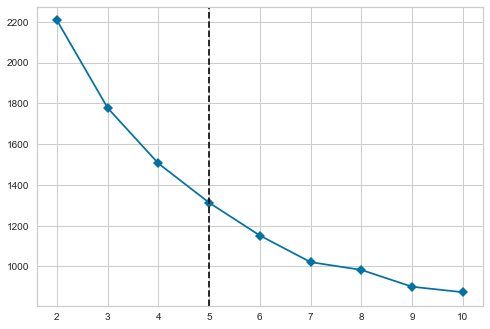

In [107]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(2, 11), timings = False)
fit = km_opt.fit(X_sca)

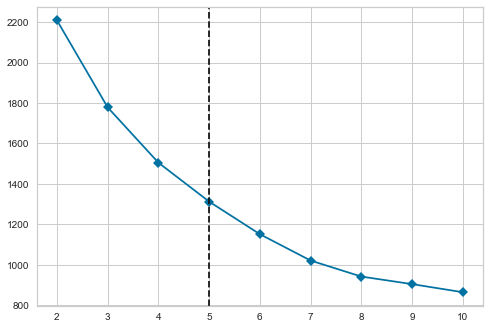

In [108]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(2, 11), timings = False, metric='distortion')
fit = km_opt.fit(X_sca)

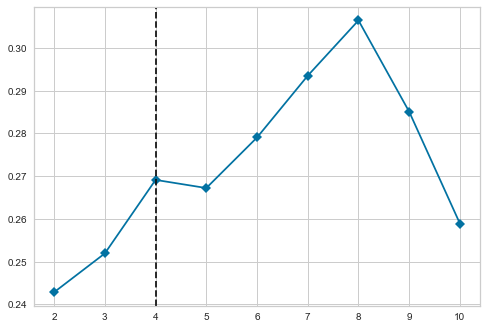

In [109]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(2, 11), timings = False,metric='silhouette')
fit = km_opt.fit(X_sca)

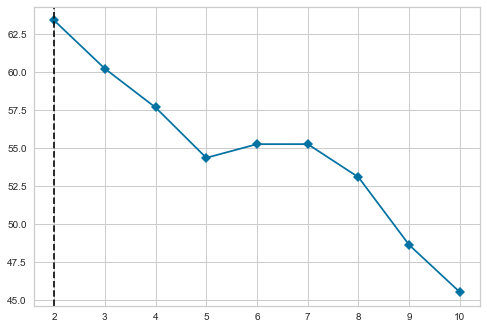

In [110]:
km_fit = KMeans()
km_opt = KElbowVisualizer(km_fit, n_clusters=(2, 11), timings = False, metric='calinski_harabasz' )
fit = km_opt.fit(X_sca)

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

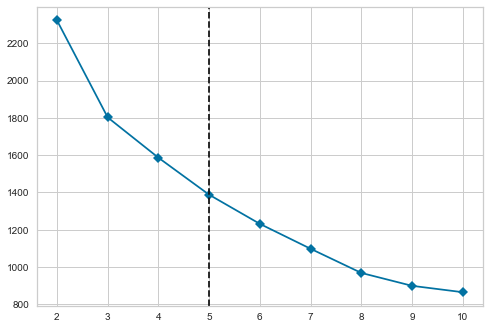

In [156]:
ac_fit = AgglomerativeClustering()
ac_opt = KElbowVisualizer(ac_fit, n_clusters=(2, 11), timings = False, metric='distortion' )
fit_ac = ac_opt.fit(X_sca)

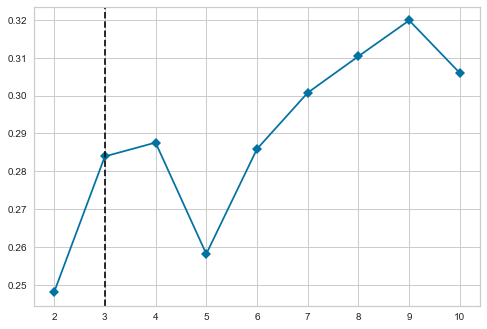

In [157]:
ac_fit = AgglomerativeClustering()
ac_opt = KElbowVisualizer(ac_fit, n_clusters=(2, 11), timings = False, metric='silhouette' )
fit_ac = ac_opt.fit(X_sca)

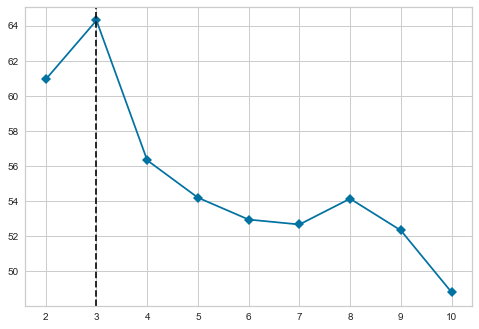

In [158]:
ac_fit = AgglomerativeClustering()
ac_opt = KElbowVisualizer(ac_fit, n_clusters=(2, 11), timings = False, metric='calinski_harabasz' )
fit_ac = ac_opt.fit(X_sca)

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [162]:
clu_vars=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline']

In [163]:
hc_fit = AgglomerativeClustering(n_clusters = 3, 
                                 affinity='euclidean', 
                                 linkage='ward')
hc_fit.fit(X_sca[clu_vars])
X_sca['clu_ward'] = [str(x) for x in hc_fit.labels_]
X['clu_ward'] = [str(x) for x in hc_fit.labels_]


In [167]:
X_sca

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,km8_clu,sil_k8,sil_k8_model,clu_ward
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,1,0.207838,0.144298,2
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,1,0.202509,0.144298,2
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,4,-0.067782,0.144298,2
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,1,0.252290,0.144298,2
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,4,0.246928,0.144298,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952,3,0.083779,0.144298,1
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893,6,0.041089,0.144298,1
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575,6,0.135708,0.144298,1
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498,6,0.222100,0.144298,1


In [168]:
data_melt = (X_sca.drop(columns=['km8_clu','sil_k8','sil_k8_model'])).melt(id_vars = ['clu_ward'])
data_melt.head()

,clu_ward,variable,value
0,2,alcohol,1.518613
1,2,alcohol,0.246290
2,2,alcohol,0.196879
3,2,alcohol,1.691550
4,2,alcohol,0.295700


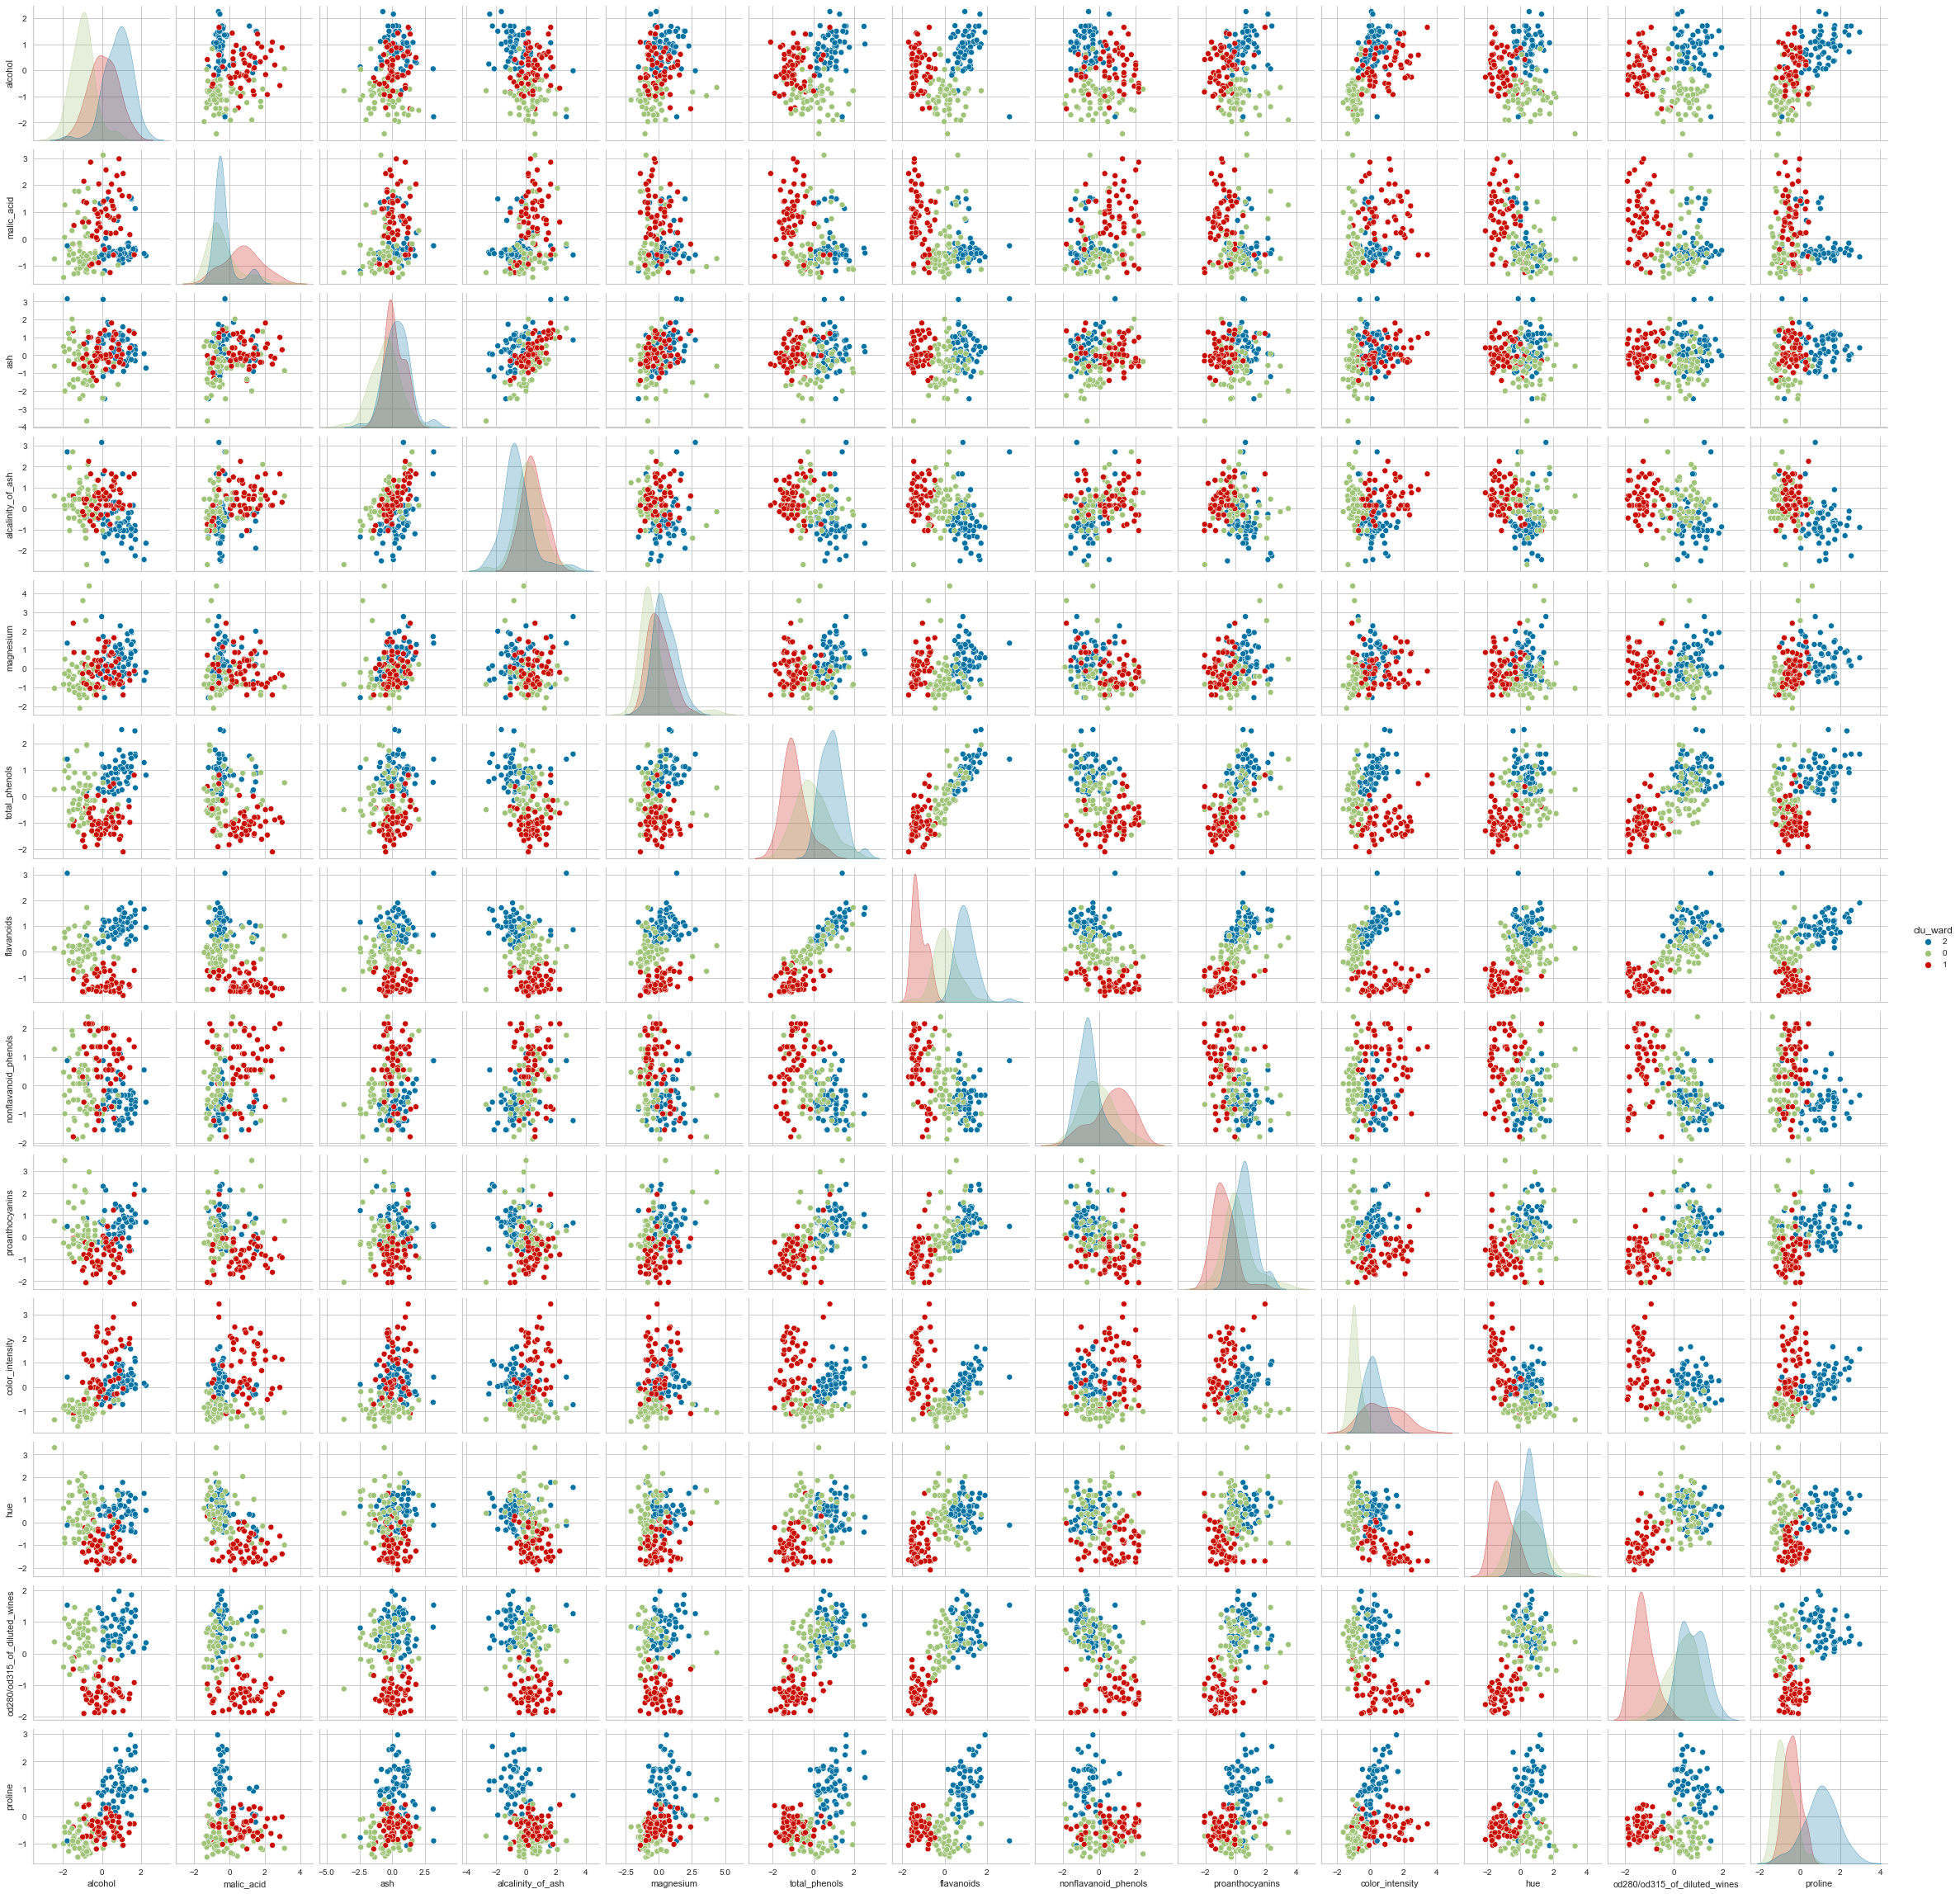

In [178]:
sns.pairplot(data = X_sca.drop(columns=['km8_clu','sil_k8','sil_k8_model']), hue= 'clu_ward')

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [179]:
PCA_fit= PCA(n_components=2)
PCA_fit.fit(X[clu_vars])
X_pca=pd.DataFrame(PCA_fit.transform(X[clu_vars]),columns=['pc1','pc2'])

<function matplotlib.pyplot.show(close=None, block=None)>

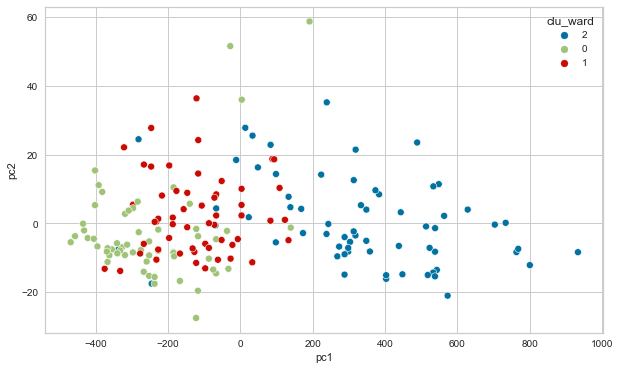

In [181]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X_pca,x=X_pca['pc1'],y=X_pca['pc2'], hue=X['clu_ward'])
plt.show

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [183]:
X_sca.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'km8_clu', 'sil_k8',
       'sil_k8_model', 'clu_ward'],
      dtype='object')

In [184]:
from sklearn.manifold import TSNE

tsne_fit = TSNE(init = 'pca', learning_rate = 'auto', perplexity=10)
array_tsne = tsne_fit.fit_transform(X_sca.drop(columns=['km8_clu', 'sil_k8',
       'sil_k8_model', 'clu_ward'], axis = 1))


X_tsne = pd.DataFrame(
    array_tsne,
    columns = ['TS_1', 'TS_2']
)



/Users/derinkivaner/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


In [187]:
X_tsne['cluster']=X_sca['clu_ward']

In [188]:
X_tsne.columns

Index(['TS_1', 'TS_2', 'cluster'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

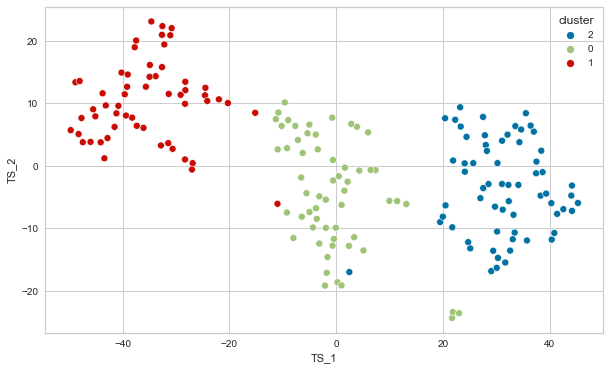

In [190]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=X_tsne,x=X_tsne['TS_1'],y=X_tsne['TS_2'], hue='cluster')
plt.show

/Users/derinkivaner/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/derinkivaner/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/derinkivaner/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(
/Users/derinkivaner/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-

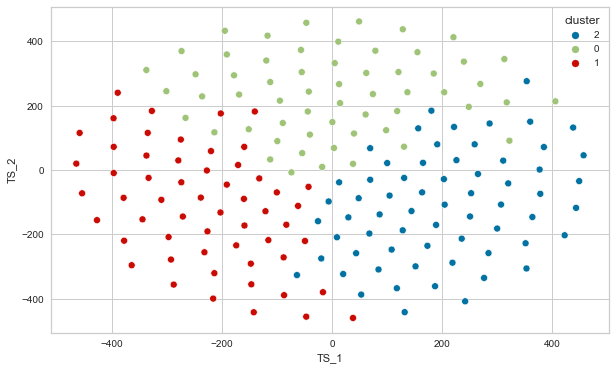

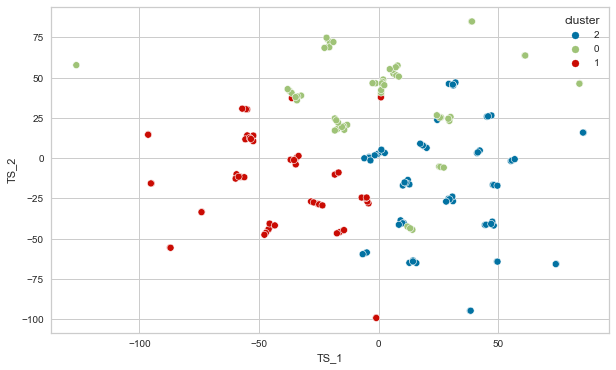

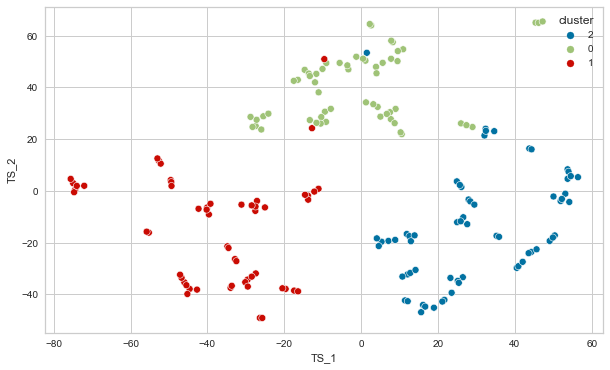

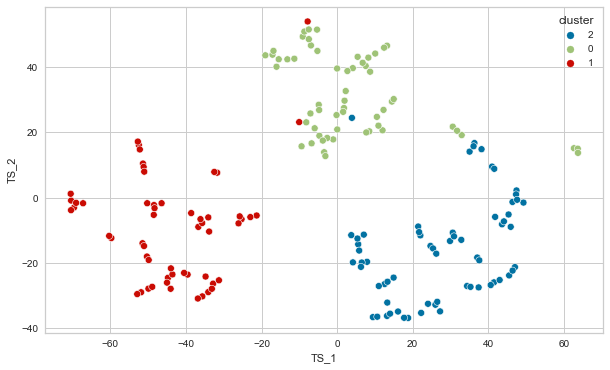

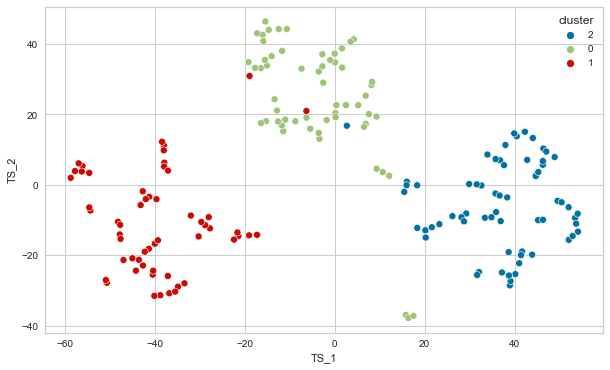

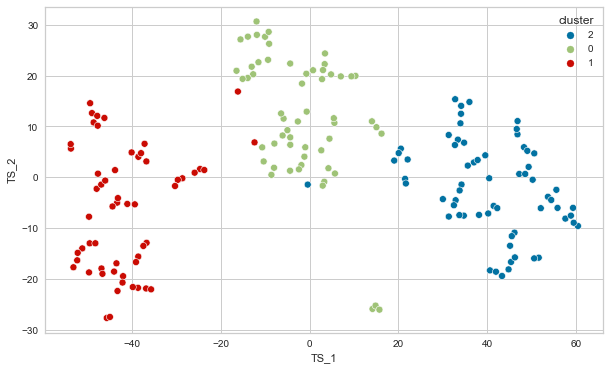

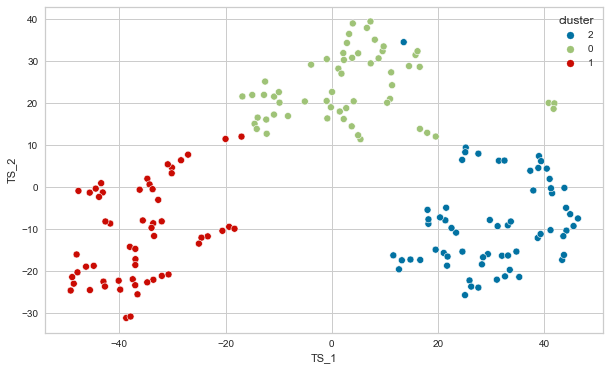

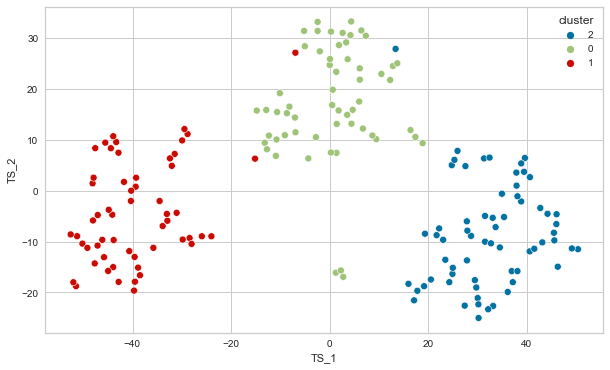

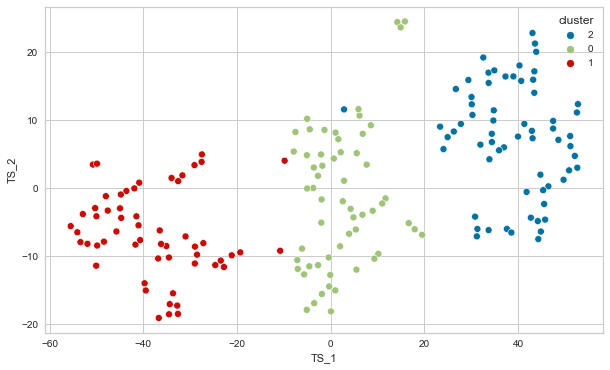

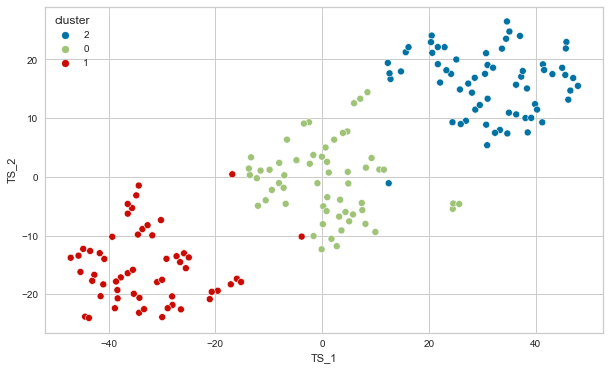

In [192]:
for i in range (10):
    tsne_fit = TSNE(init = 'pca', learning_rate = 'auto', perplexity=i)
    array_tsne = tsne_fit.fit_transform(X_sca.drop(columns=['km8_clu', 'sil_k8',
           'sil_k8_model', 'clu_ward'], axis = 1))

    X_tsne = pd.DataFrame(
        array_tsne,
        columns = ['TS_1', 'TS_2']
    )
    X_tsne['cluster']=X_sca['clu_ward']
    X_tsne.columns
    plt.figure(figsize=(10,6))
    sns.scatterplot(data=X_tsne,x=X_tsne['TS_1'],y=X_tsne['TS_2'], hue='cluster')
    plt.show